# Import Necessary Libraries

In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set plot style for Seaborn
sns.set(style="whitegrid")

# Step 1: Load the Dataset

In [3]:
df = pd.read_csv("airnb.csv")

# Step 2: Basic Data Exploration

In [4]:
# View the First Few Rows of the Dataset
df.head()

,Title,Detail,Date,Price(in dollar),Offer price(in dollar),Review and rating,Number of bed
0,"Chalet in Skykomish, Washington, US",Sky Haus - A-Frame Cabin,Jun 11 - 16,306.00,229.00,4.85 (531),4 beds
1,"Cabin in Hancock, New York, US",The Catskill A-Frame - Mid-Century Modern Cabin,Jun 6 - 11,485.00,170.00,4.77 (146),4 beds
2,"Cabin in West Farmington, Ohio, US",The Triangle: A-Frame Cabin for your city retreat,Jul 9 - 14,119.00,522.00,4.91 (515),4 beds
3,"Home in Blue Ridge, Georgia, US",*Summer Sizzle* 5 Min to Blue Ridge* Pets* Hot...,Jun 11 - 16,192.00,348.00,4.94 (88),5 beds
4,"Treehouse in Grandview, Texas, US",Luxury Treehouse Couples Getaway w/ Peaceful V...,Jun 4 - 9,232.00,196.00,4.99 (222),1 queen bed


In [5]:
# Get Information About the Data Types and Non-null Counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   953 non-null    object
 1   Detail                  953 non-null    object
 2   Date                    953 non-null    object
 3   Price(in dollar)        953 non-null    object
 4   Offer price(in dollar)  166 non-null    object
 5   Review and rating       947 non-null    object
 6   Number of bed           953 non-null    object
dtypes: object(7)
memory usage: 52.2+ KB


In [ ]:
# Count Missing Values in Each Columns
df.isnull().sum()

# Step 3: Data Cleaning and Transformation

In [7]:
df["RoomType"] = df["Title"].str.extract(r'^(.*?) in')
df["City"] = df["Title"].str.extract(r'in\s([^,]+)')
df["Location"] = df["Title"].str.extract(r',\s*([^,]+)$')

In [8]:
# Replace missing offer prices with regular prices
df['Offer price(in dollar)'] = df['Offer price(in dollar)'].fillna(df['Price(in dollar)'])

In [9]:
# Convert price columns to numeric
df['Price(in dollar)'] = df['Price(in dollar)'].str.replace(',', '').astype(float)
df['Offer price(in dollar)'] = df['Offer price(in dollar)'].str.replace(',', '').astype(float)

In [10]:
# Create a new column for discounts
df['Discount'] = df['Price(in dollar)'] - df['Offer price(in dollar)']

In [11]:
# Split the 'Date' column into 'StartDate' and 'EndDate'
df[['StartDate', 'EndDate']] = df['Date'].str.split(' - ', expand=True)

In [12]:
# Fill missing months in 'EndDate'
df['EndDate'] = np.where(
    df['EndDate'].str.count(' ') < 1,  # Check if the EndDate is missing the month
    df['StartDate'].str.split(' ').str[0] + ' ' + df['EndDate'],  # Add the month from StartDate
    df['EndDate']
)

In [13]:
# Convert 'StartDate' and 'EndDate' to datetime format
df['StartDate'] = pd.to_datetime(df['StartDate'] + ' 2023', format='%b %d %Y')
df['EndDate'] = pd.to_datetime(df['EndDate'] + ' 2023', format='%b %d %Y')

In [14]:
# Calculate the stay duration in days
df['StayDuration'] = (df['EndDate'] - df['StartDate']).dt.days

In [ ]:
df.info()

In [ ]:
no_country = df[df['Location'].isna()]
no_country.head()

In [21]:
df['Location'] = df['Location'].fillna('N/A')

In [23]:
# Removes rows with missing values
df.dropna(inplace=True)

In [25]:
# Extract rating and number of reviews from 'Review and rating'
df['Rating'] = df['Review and rating'].str.extract(r'(\d+\.\d+)').astype(float)
df['NumOfReviews'] = df['Review and rating'].str.extract(r'\((\d+)\)').fillna(0).astype(int)

In [27]:
# Removes rows with missing ratings
df.dropna(inplace=True)

In [29]:
# Extract and convert 'Number of bed' to integer
df['Number of bed'] = df['Number of bed'].str.extract(r'(\d+)').astype(int)

In [30]:
# View the first few rowa
df.head(6)

,Title,Detail,Date,Price(in dollar),Offer price(in dollar),Review and rating,Number of bed,RoomType,City,Location,Discount,StartDate,EndDate,StayDuration,Rating,NumOfReviews
0,"Chalet in Skykomish, Washington, US",Sky Haus - A-Frame Cabin,Jun 11 - 16,306.0,229.0,4.85 (531),4,Chalet,Skykomish,US,77.0,2023-06-11,2023-06-16,5,4.85,531
1,"Cabin in Hancock, New York, US",The Catskill A-Frame - Mid-Century Modern Cabin,Jun 6 - 11,485.0,170.0,4.77 (146),4,Cabin,in Hancock,US,315.0,2023-06-06,2023-06-11,5,4.77,146
2,"Cabin in West Farmington, Ohio, US",The Triangle: A-Frame Cabin for your city retreat,Jul 9 - 14,119.0,522.0,4.91 (515),4,Cabin,in West Farmington,US,-403.0,2023-07-09,2023-07-14,5,4.91,515
3,"Home in Blue Ridge, Georgia, US",*Summer Sizzle* 5 Min to Blue Ridge* Pets* Hot...,Jun 11 - 16,192.0,348.0,4.94 (88),5,Home,Blue Ridge,US,-156.0,2023-06-11,2023-06-16,5,4.94,88
4,"Treehouse in Grandview, Texas, US",Luxury Treehouse Couples Getaway w/ Peaceful V...,Jun 4 - 9,232.0,196.0,4.99 (222),1,Treehouse,Grandview,US,36.0,2023-06-04,2023-06-09,5,4.99,222
5,"Tiny home in Puerto Escondido, Mexico",Casa Tiny near Casa Wabi,Jun 21 - 26,261.0,148.0,4.84 (555),1,Tiny home,Puerto Escondido,Mexico,113.0,2023-06-21,2023-06-26,5,4.84,555


In [31]:
# Count missing values in each column
df.isnull().sum()

,0
Title,0
Detail,0
Date,0
Price(in dollar),0
Offer price(in dollar),0
Review and rating,0
Number of bed,0
RoomType,0
City,0
Location,0


# Step 4: Handle Duplicates

In [32]:
# Count duplicate rows
df.duplicated().sum()

39

In [33]:
# Remove duplicates and keep the first occurrence
df.drop_duplicates(keep='first', inplace=True)

In [34]:
# Verify the changes
df.duplicated().sum()

0

In [35]:
# Drop unnecessary columns
df.drop(['Date', 'Review and rating'], axis=1, inplace=True)

In [36]:
# Rename columns for better readability
df.rename(columns={
    'Price(in dollar)': 'Price',
    'Offer price(in dollar)': 'OfferPrice',
    'Number of bed': 'NumOfBeds'
}, inplace=True)

In [37]:
# View the column names
df.columns

Index(['Title', 'Detail', 'Price', 'OfferPrice', 'NumOfBeds', 'RoomType',
       'City', 'Location', 'Discount', 'StartDate', 'EndDate', 'StayDuration',
       'Rating', 'NumOfReviews'],
      dtype='object')

# Step 5: Exploratory Data Analysis (EDA)

<ipython-input-54-bcfdcf94dfff>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['RoomType'], order=df['RoomType'].value_counts().head(20).index, palette='viridis')


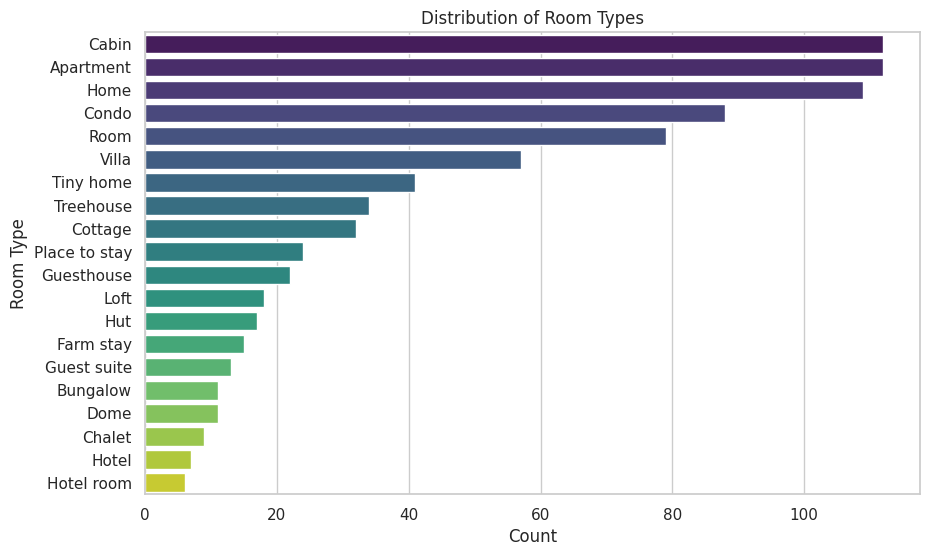

In [54]:
# Bar Chart for Room Type Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y=df['RoomType'], order=df['RoomType'].value_counts().head(20).index, palette='viridis')
plt.title('Distribution of Room Types')
plt.xlabel('Count')
plt.ylabel('Room Type')
plt.show()

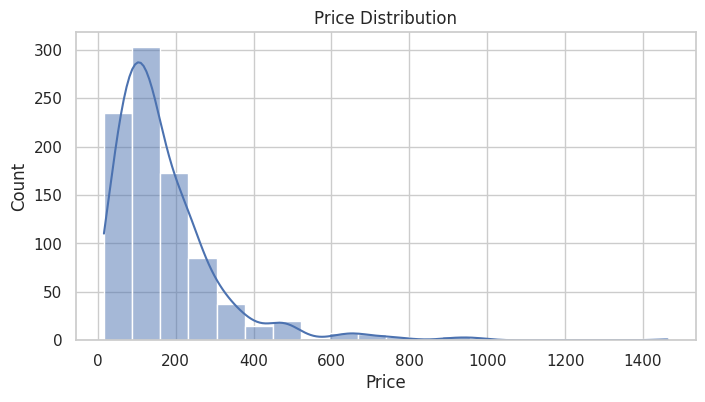

In [46]:
# Histogram for Price Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title(f'Price Distribution')
plt.show()

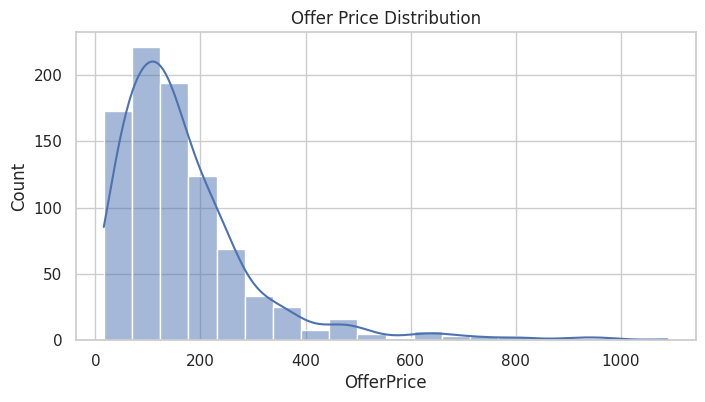

In [45]:
# Histogram for Offer Price Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['OfferPrice'], bins=20, kde=True)
plt.title(f'Offer Price Distribution')
plt.show()

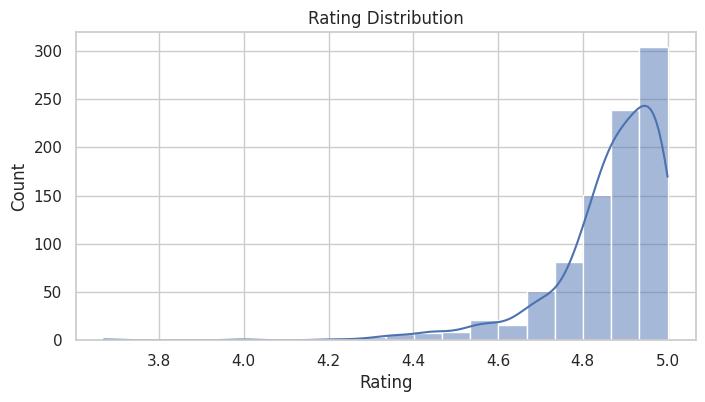

In [47]:
# Histogram for Rating Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title(f'Rating Distribution')
plt.show()

In [42]:
# View the skewness of the price columns
print(df['Price'].skew())
print(df['OfferPrice'].skew())
print(df['Discount'].skew())

2.8810432056530533
2.5686825452712596
0.6350829729749952


In [43]:
# Log-transform Price and OfferPrice to reduce skewness
df['LogPrice'] = np.log1p(df['Price'])
df['LogOfferPrice'] = np.log1p(df['OfferPrice'])

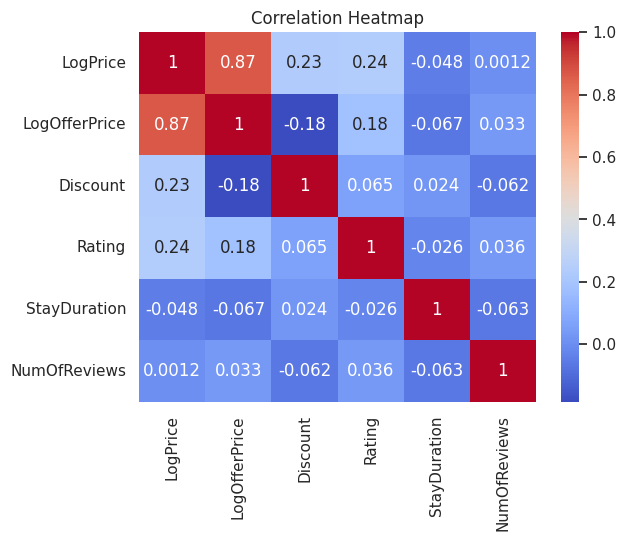

In [44]:
# Calculate and visualize the Pearson correlation matrix
corr_matrix = df[['LogPrice', 'LogOfferPrice', 'Discount', 'Rating', 'StayDuration', 'NumOfReviews']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

<ipython-input-85-f54dd4af480a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=room_df['RoomType'], y=room_df['Price'], palette='coolwarm')


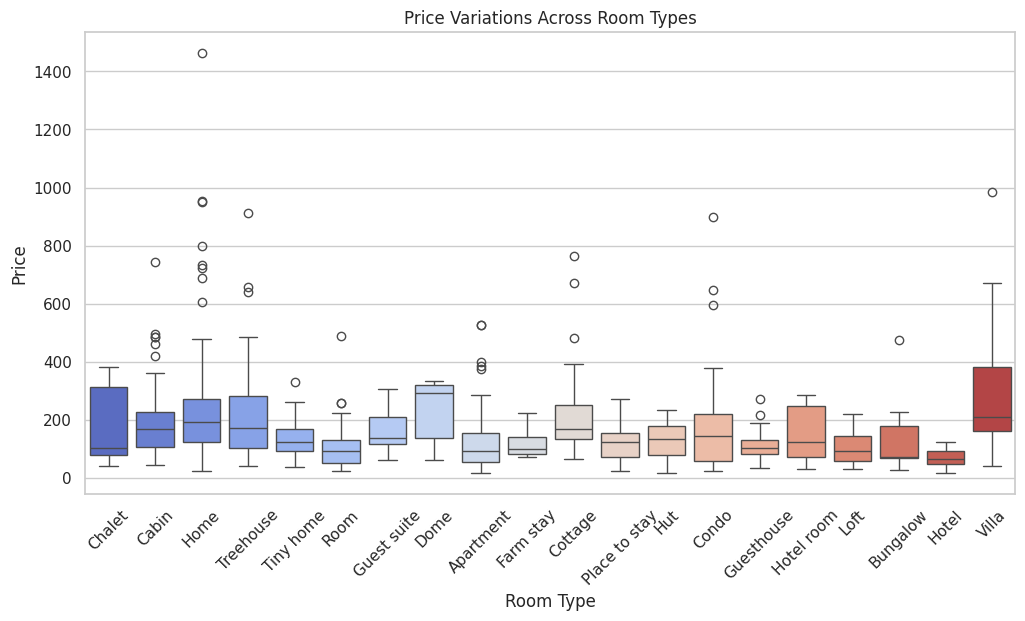

In [85]:
top_room_types = df['RoomType'].value_counts().index[:20]
room_df = df[df['RoomType'].isin(top_room_types)]

plt.figure(figsize=(12, 6))
sns.boxplot(x=room_df['RoomType'], y=room_df['Price'], palette='coolwarm')
# plt.yscale('log')  # Use log scale for better visualization if needed
plt.title('Price Variations Across Room Types')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# Step 6: Regression Analysis

In [ ]:
# OLS Regression: StayDuration vs LogPrice
X = sm.add_constant(df['StayDuration'])
y = df['LogPrice']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               LogPrice   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.039
Date:                Tue, 11 Feb 2025   Prob (F-statistic):              0.154
Time:                        09:02:00   Log-Likelihood:                -975.50
No. Observations:                 892   AIC:                             1955.
Df Residuals:                     890   BIC:                             1965.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.2564      0.255     20.601   

In [ ]:
# OLS Regression: Rating vs LogPrice
X = sm.add_constant(df['Rating'])
y = df['LogPrice']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               LogPrice   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     54.67
Date:                Tue, 11 Feb 2025   Prob (F-statistic):           3.29e-13
Time:                        09:15:14   Log-Likelihood:                -949.93
No. Observations:                 892   AIC:                             1904.
Df Residuals:                     890   BIC:                             1913.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2832      0.836     -1.535      0.1

In [ ]:
# OLS Regression: Rating vs Discount
X = sm.add_constant(df['Rating'])
y = df['Discount']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Discount   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.833
Date:                Tue, 11 Feb 2025   Prob (F-statistic):             0.0506
Time:                        09:23:04   Log-Likelihood:                -5199.1
No. Observations:                 892   AIC:                         1.040e+04
Df Residuals:                     890   BIC:                         1.041e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -190.1167     97.924     -1.941      0.0

In [ ]:
X = df[['LogOfferPrice', 'Discount', 'StayDuration']]
y = df['LogPrice']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               LogPrice   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     3109.
Date:                Tue, 11 Feb 2025   Prob (F-statistic):               0.00
Time:                        09:08:19   Log-Likelihood:                 112.92
No. Observations:                 892   AIC:                            -217.8
Df Residuals:                     888   BIC:                            -198.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2907      0.092      3.143

# Step 7: Visualizations

<ipython-input-66-fec4692c3930>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=city_df['City'], y=city_df['Price'], palette='magma')


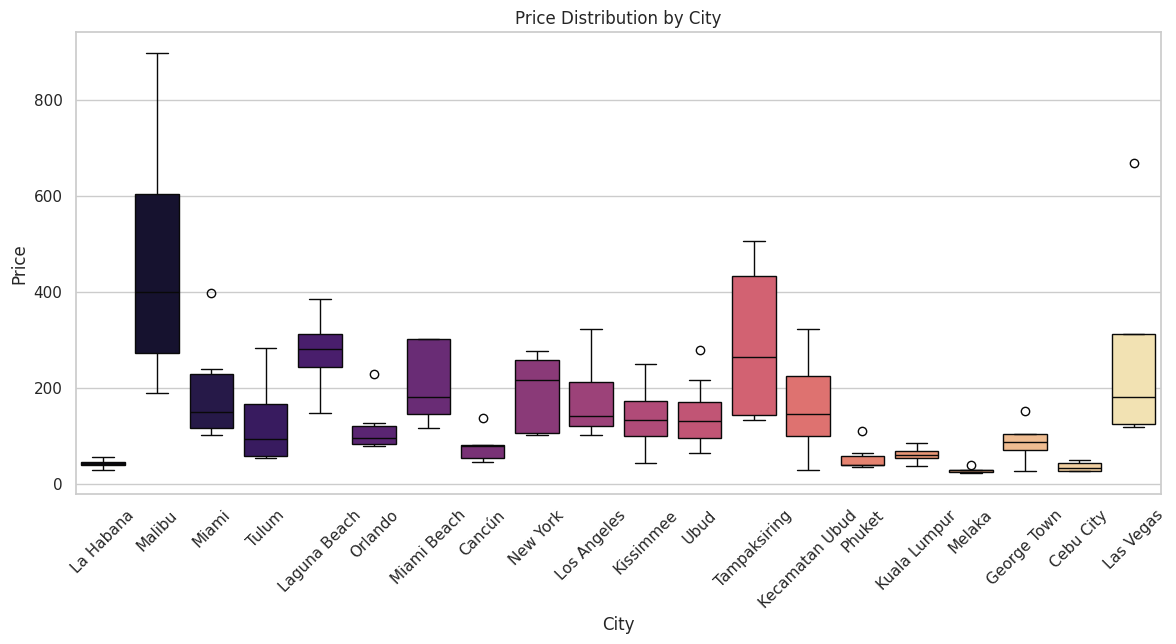

In [66]:
top_cities = df['City'].value_counts().index[:20]
city_df = df[df['City'].isin(top_cities)]

plt.figure(figsize=(14, 6))
sns.boxplot(x=city_df['City'], y=city_df['Price'], palette='magma')
plt.title('Price Distribution by City')
plt.xlabel('City')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

<ipython-input-59-1c3245ff7b2a>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=city_df['City'], y=city_df['Price'], palette='magma')


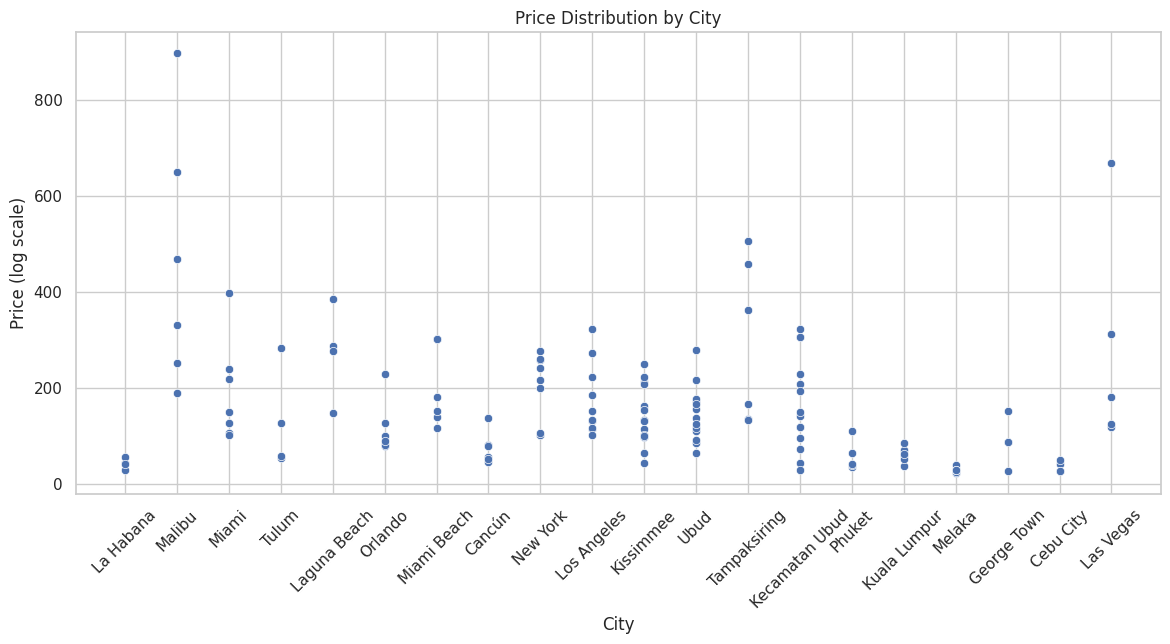

In [59]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x=city_df['City'], y=city_df['Price'], palette='magma')
plt.title('Price Distribution by City')
plt.xlabel('City')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

<ipython-input-64-bd4b91f06ac9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=country_df['Location'], y=country_df['Price'], palette='coolwarm')


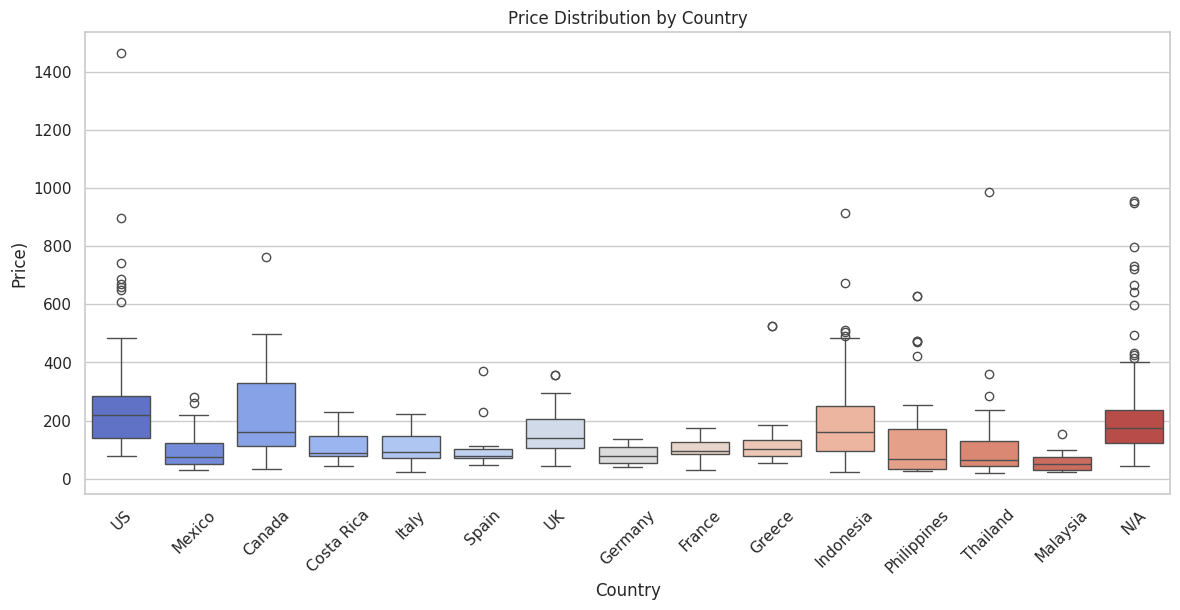

In [64]:
top_countries = df['Location'].value_counts().index[:15]
country_df = df[df['Location'].isin(top_countries)]

plt.figure(figsize=(14, 6))
sns.boxplot(x=country_df['Location'], y=country_df['Price'], palette='coolwarm')
plt.title('Price Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Price)')
plt.xticks(rotation=45)
plt.show()

<ipython-input-65-a1fcf24be901>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=country_df['Location'], y=country_df['Price'], palette='magma')


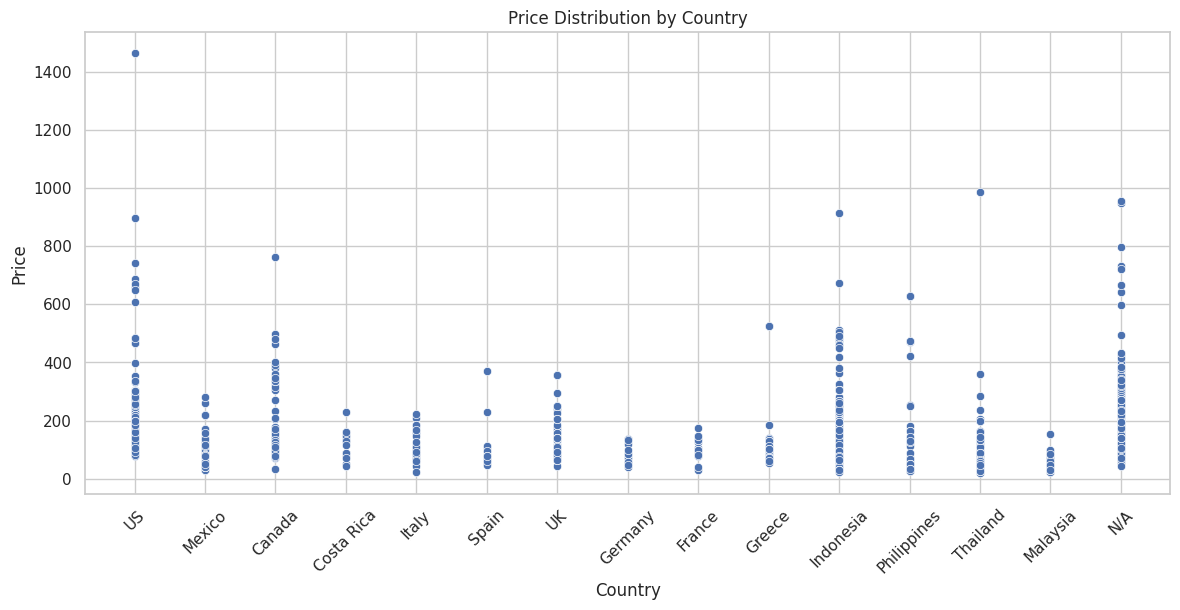

In [65]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x=country_df['Location'], y=country_df['Price'], palette='magma')
plt.title('Price Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

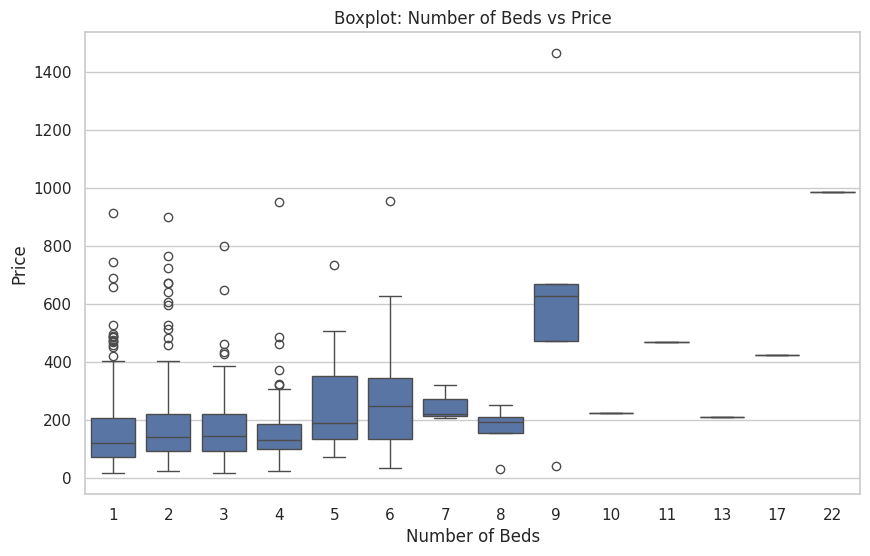

In [69]:
# Boxplot: Number of Beds vs Price
plt.figure(figsize=(10,6))
sns.boxplot(x='NumOfBeds', y='Price', data=df)
plt.title('Boxplot: Number of Beds vs Price')
plt.xlabel('Number of Beds')
plt.ylabel('Price')
plt.show()

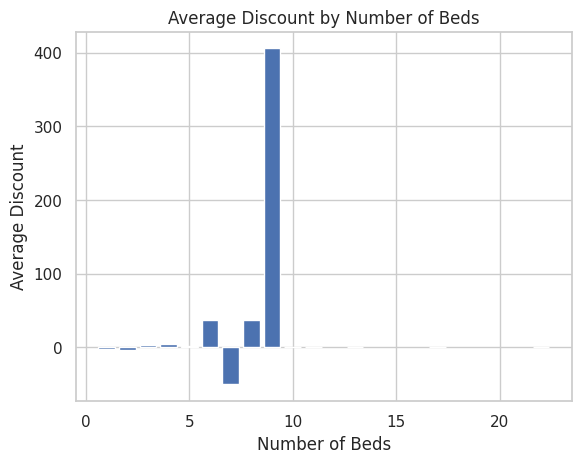

In [71]:
# Average Discount by Number of Beds
avg_discount = df.groupby('NumOfBeds')['Discount'].mean().reset_index()

plt.bar(avg_discount['NumOfBeds'], avg_discount['Discount'])
plt.title('Average Discount by Number of Beds')
plt.xlabel('Number of Beds')
plt.ylabel('Average Discount')
plt.show()

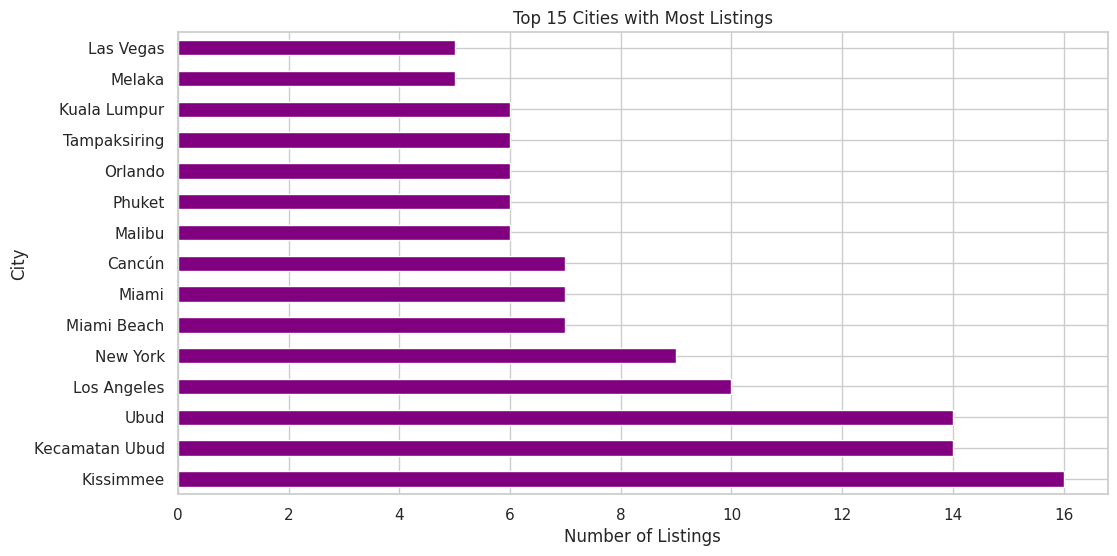

In [74]:
# Bar Chart of Top Cities
plt.figure(figsize=(12, 6))
df['City'].value_counts().nlargest(15).plot(kind='barh', color='purple')
plt.title('Top 15 Cities with Most Listings')
plt.xlabel('Number of Listings')
plt.ylabel('City')
plt.show()

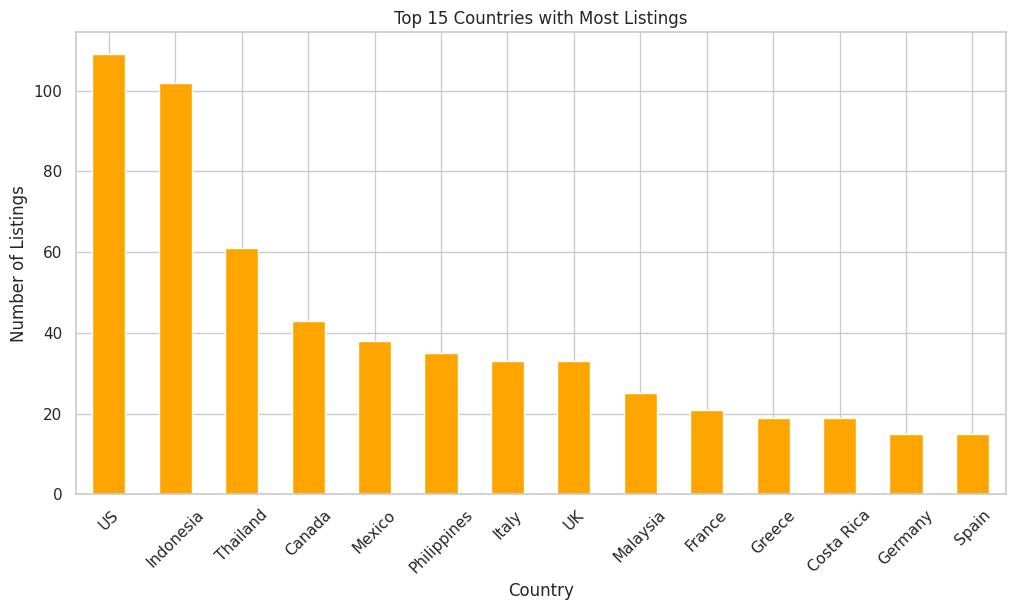

In [77]:
# Bar Chart of Top Countries
plt.figure(figsize=(12, 6))
df['Location'].value_counts().nlargest(15)[1:].plot(kind='bar', color='orange')  # Unknown (N/A) has the highest entries and is excluded
plt.title('Top 15 Countries with Most Listings')
plt.xlabel('Country')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

In [78]:
# Extract month and generate month names from 'StartDate'
df['Month'] = df['StartDate'].dt.month
df['MonthName'] = df['StartDate'].dt.strftime('%B')

# Order the months in calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

Text(0, 0.5, 'Average Price')

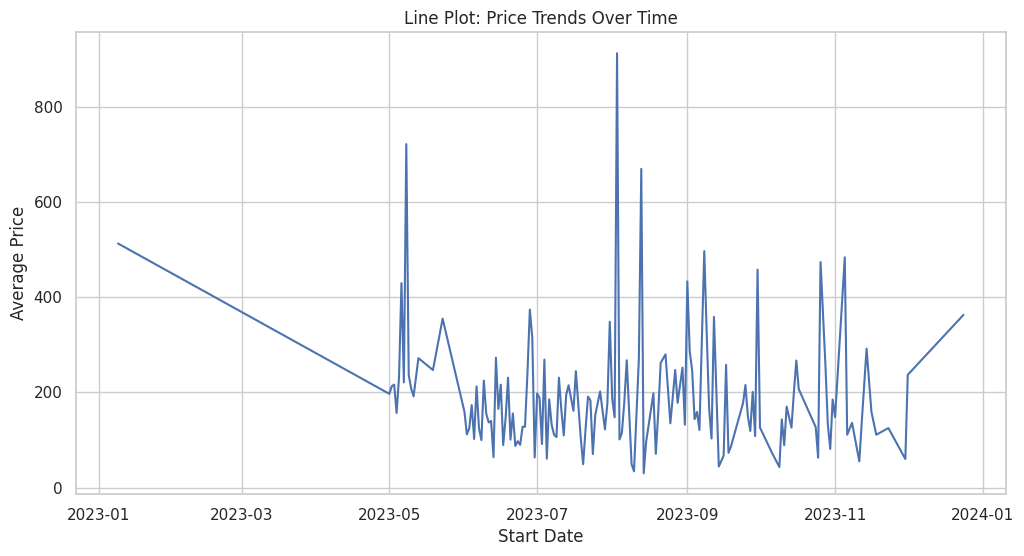

In [81]:
# Group by 'start_date' and calculate the mean price
time_series = df.groupby('StartDate')['Price'].mean()

plt.figure(figsize=(12,6))
plt.plot(time_series.index, time_series.values)
plt.title('Line Plot: Price Trends Over Time')
plt.xlabel('Start Date')
plt.ylabel('Average Price')

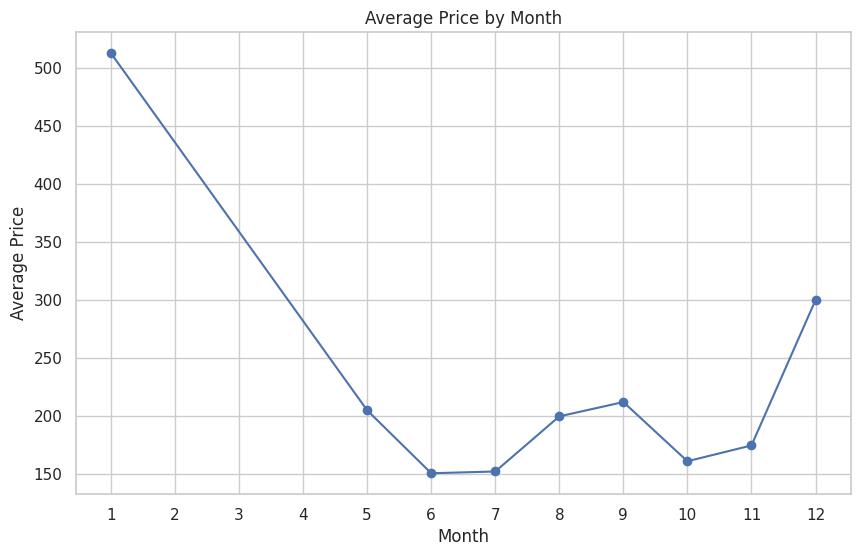

In [83]:
# Group by month and calculate the average price
avg_price_by_month = df.groupby('Month')['Price'].mean().reset_index()

# Plotting the average price by month
plt.figure(figsize=(10,6))
plt.plot(avg_price_by_month['Month'], avg_price_by_month['Price'], marker='o')
plt.title('Average Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(range(1, 13))  # Set x-axis ticks for each month
plt.grid(True)
plt.show()

<ipython-input-84-667e6adef927>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=month_avg.index, y=month_avg.values, ci=None, palette="Blues")
<ipython-input-84-667e6adef927>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_avg.index, y=month_avg.values, ci=None, palette="Blues")


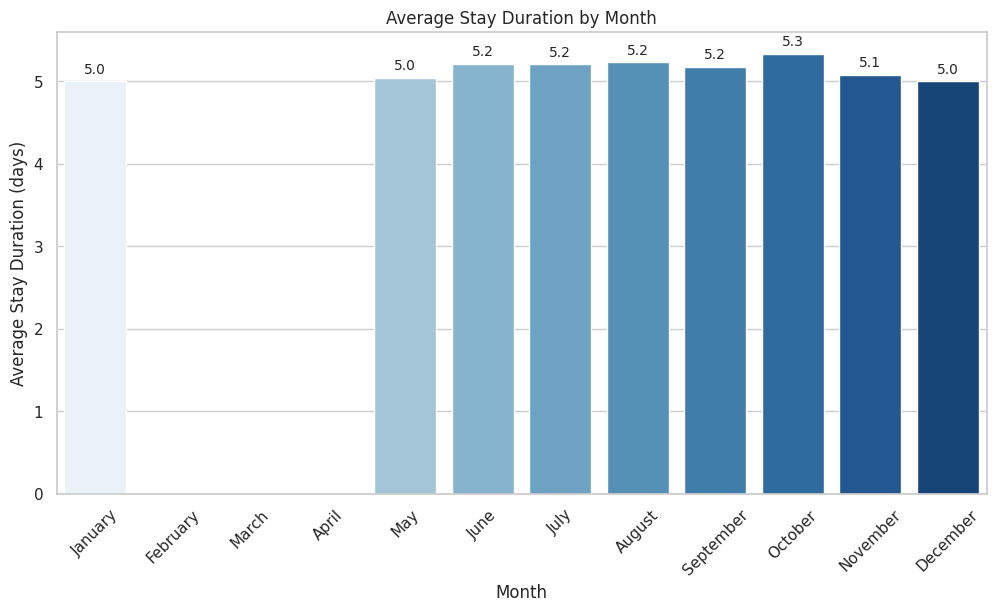

In [84]:
# Calculate average stay duration for each month
month_avg = df.groupby('MonthName')['StayDuration'].mean().reindex(month_order)

# Plot the average stay duration per month name
plt.figure(figsize=(12, 6))
sns.barplot(x=month_avg.index, y=month_avg.values, ci=None, palette="Blues")

# Add value labels on each bar
for i, v in enumerate(month_avg.values):
    plt.text(i, v + 0.1, f'{v:.1f}', ha='center', fontsize=10)

plt.xlabel('Month')
plt.ylabel('Average Stay Duration (days)')
plt.title('Average Stay Duration by Month')
plt.xticks(rotation=45)
plt.show()